In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
num_samps = 100
freqs = [5,10,15,20,25,30,35,40,45,50]
num_freqs = len(freqs)
t = np.arange(0,.1,0.001)
X = np.zeros((num_freqs,num_samps,t.shape[0]+1))
X_r = np.zeros((num_freqs*num_samps,t.shape[0],t.shape[0]))

freq1 = 50

for i in np.arange(0,num_samps):
    for j in np.arange(0,num_freqs):
        X[j,:,-1] = freqs[j]
        phase1 = np.random.uniform(0,2*np.pi,1)
        X[j,i,:-1] = np.sin(2*np.pi*freqs[j]*t + phase1) + np.random.normal(0,0.1,t.shape[0])

Text(0.5, 1.0, 'wave1 label: 5.0 wave2 label: 30.0')

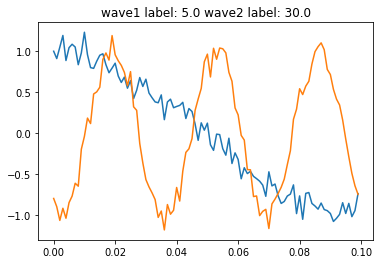

In [67]:
plt.plot(t,X[0,0,:-1])
plt.plot(t,X[5,1,:-1])
plt.title('wave1 label: {} wave2 label: {}'.format(X[0,0,-1],X[5,1,-1]))

In [68]:
import sklearn as sk
import sklearn.metrics.pairwise

def recurrence_plot(s, eps=None, steps=None):
    if eps==None: eps=0.1
    if steps==None: steps=10
    d = sk.metrics.pairwise.pairwise_distances(s)
    d = np.floor(d / eps)
    d[d > steps] = steps
    #Z = squareform(d)
    return d

In [69]:
X_2d = X.reshape(num_samps*num_freqs,-1)
X_2d.shape
np.random.shuffle(X_2d)

In [70]:
for i in np.arange(0,num_freqs*num_samps):
    X_r[i,:,:] = recurrence_plot(X_2d[i,:-1].reshape(-1,1))

Text(0.5, 1.0, 'label: 45.0')

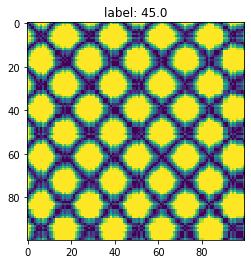

In [71]:
plt.imshow(X_r[100,:,:])
plt.title('label: {}'.format(X_2d[100,-1]))

In [72]:
np.save('recurrence',X_r)
np.save('recurrence_labs',X_2d[:,-1])